In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Import data set
from tensorflow.keras.datasets import cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
# 1.1a Find out how many images there are in the training and test set
print('Number of images in the training set:', len(train_images))

print('Number of images in the test set: ', len(test_images))

Number of images in the training set: 50000
Number of images in the test set:  10000


In [5]:
# 1.1a) Find what type of labeling is used in the data set

print(train_labels.max())
print(train_labels.min())

# CIFAR10 uses labels 0-9 to catagorize the images

9
0


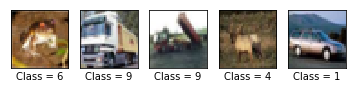

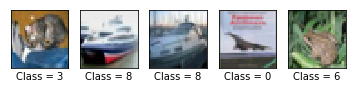

In [6]:
'''
1.1b: Show the first 5 images training set, display them in one row, with the corresponding class
label below each image.

1.1c: Show the first 5 images in the testing set, display them in a second
row, with the corresponding class label below each image. 
'''
# Print a row of the first 5 training images, with class below 
fig1 = plt.figure()
for img in range(0,5):

    a = fig1.add_subplot(1,5,img+1)
    plt.imshow(train_images[img], cmap=plt.cm.binary)
    a.set_xticks([])
    a.set_yticks([])
    label = str(train_labels[img][0])
    subtitle = 'Class = ' + label
    a.set(xlabel=subtitle)
 
# Print row of the first 5 test images, with class below 
fig2 = plt.figure()
for img in range(0,5):
    a = fig2.add_subplot(2,5,img+1)
    plt.imshow(test_images[img], cmap=plt.cm.binary)
    a.set_xticks([])
    a.set_yticks([])
    label = str(test_labels[img][0])
    subtitle = 'Class = ' + label
    a.set(xlabel=subtitle) 

In [7]:
'''
1.1d: Normalize all image pixels to the range of 0-1.
'''

# In the last project, we normalized the data by subtracting the mean and dividing by the standard deviation. 
# We do not want to do that here, because that would give us data with values less than 1. 

# Instead, divide by the greatest value, which is 255. 
# The book also converts the data from uitn8 to float32, so we will too
train_images = train_images.astype('float32')/255

test_images = test_images.astype('float32')/255

In [8]:
train_images.max()

1.0

In [9]:
print(test_labels[0])

[3]


In [10]:
'''
This is a multiclass, single-label classification problem
The book says we should use categorical_crossentropy as our loss function, thus we need to make our labels 
1 hot vectors. To do so, import to_categorical. 
'''
from tensorflow.keras.utils import to_categorical

In [11]:
train_labels_categorical = to_categorical(train_labels)

test_labels_categorical = to_categorical(test_labels)

In [12]:
print(train_labels_categorical[0]) 
print(test_labels_categorical[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [13]:
train_images.shape

(50000, 32, 32, 3)

In [14]:
'''
1.2a: Build a CNN model with the following structure:
    i. Three convolutional layers with 16, 32, and 64 3x3 filters
        and Relu activations. Each output feature map should have
        the same dimension as the input to this layer. Each Conv
        layer is followed by a 2x2 Maxpooling layer with stride of 2.
    ii. A Fully Connected layers with 1024 neurons
'''
from tensorflow.keras import layers
from tensorflow.keras import models

def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3), padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2))
    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2))
    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2)) 

    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(10, activation='softmax')) 

    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [15]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [16]:
'''
1.2 b) Before training the above model, test your model with the first
image in the testing set, print out the predicted probability for each
class, and find the cross entropy loss of the untrained model for this
testing sample. Verify this loss is approximately log(C).
'''
# Prepare image, we have to reshape it to feed to network. (It expects batches, so we make it bs=1)
image = test_images[0].reshape(1,32,32,3)
predictions = model.predict(image)
print(predictions)

[[0.10171203 0.09746508 0.09564931 0.09968955 0.10127325 0.09965683
  0.10241847 0.09147882 0.10537198 0.10528461]]


In [17]:
loss_untrained_model = keras.losses.categorical_crossentropy(test_labels_categorical[0],predictions)

In [18]:
print(float(loss_untrained_model))

2.305694341659546


In [19]:
np.log(10)

2.302585092994046

#### The loss is approximately log(C), where C is the number of classes 

## 1.3 Model Training

In [20]:
'''
1.3a: Use default hyperparameter values, train the model for 20 epochs.
validate after each epoch. 
'''
# Isolate validation data
# Create a list of random integers between 0 and 50,000
num_val_samples = 5000

shuffle_indices = random.sample(range(0,50000), num_val_samples)

# Train images with random indices become new validation set
val_images = train_images[shuffle_indices]
val_labels = train_labels[shuffle_indices]
val_labels_categorical = train_labels_categorical[shuffle_indices]

# Remove the validation set from the training set 
train_images = np.delete(train_images, shuffle_indices, axis=0)
train_labels = np.delete(train_labels, shuffle_indices, axis=0)
train_labels_categorical = np.delete(train_labels_categorical, shuffle_indices, axis=0)

In [21]:
num_epochs = 20

model = build_model()

history = model.fit(train_images, train_labels_categorical, 
                    validation_data=(val_images, val_labels_categorical), 
                    epochs=num_epochs, verbose=1)
# note that the default batch size is 32

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 7s 154us/sample - loss: 2.0120 - accuracy: 0.2664 - val_loss: 1.7740 - val_accuracy: 0.3474
Epoch 2/20
45000/45000 [==============================] - 6s 136us/sample - loss: 1.6281 - accuracy: 0.4144 - val_loss: 1.6106 - val_accuracy: 0.4000
Epoch 3/20
45000/45000 [==============================] - 6s 133us/sample - loss: 1.4622 - accuracy: 0.4778 - val_loss: 1.4987 - val_accuracy: 0.4568
Epoch 4/20
45000/45000 [==============================] - 6s 138us/sample - loss: 1.3475 - accuracy: 0.5207 - val_loss: 1.3494 - val_accuracy: 0.5204
Epoch 5/20
45000/45000 [==============================] - 6s 137us/sample - loss: 1.2465 - accuracy: 0.5601 - val_loss: 1.3348 - val_accuracy: 0.5148
Epoch 6/20
45000/45000 [==============================] - 6s 135us/sample - loss: 1.1617 - accuracy: 0.5923 - val_loss: 1.5262 - val_accuracy: 0.4456
Epoch 7/20
45000/45000 [===========================

In [22]:
print((history.history.keys()))

dict_keys(['accuracy', 'loss', 'val_loss', 'val_accuracy'])


In [23]:
epoch_range = list(range(1, num_epochs+1))
training_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [24]:
epoch_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Text(0.5, 1.0, 'Training and Validation Loss')

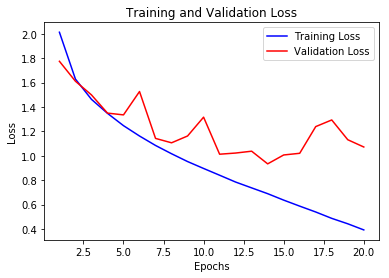

In [25]:
plt.plot(epoch_range, training_loss, 'b', label='Training Loss')
plt.plot(epoch_range, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')


Text(0.5, 1.0, 'Training and Validation Accuracy')

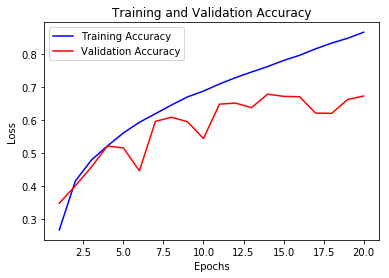

In [26]:
plt.plot(epoch_range, train_acc, 'b', label='Training Accuracy')
plt.plot(epoch_range, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Accuracy')

## 1.4 Model Evaluation

In [27]:
'''
1.4a) Use testing data set to evaluate the testing accuracy of the 
trained model. 
'''

test_loss, test_accuracy = model.evaluate(test_images, test_labels_categorical)

10000/10000 [==============================] - 1s 88us/sample - loss: 1.0830 - accuracy: 0.6745


In [28]:
print('Test Loss = ', test_loss)
print('Test Accuracy = ', test_accuracy)

Test Loss =  1.082989653110504
Test Accuracy =  0.6745


##  1.5 Prediction

Correct Class =  6


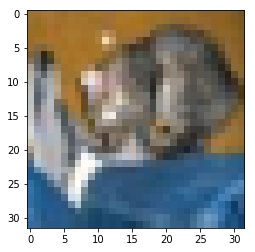

In [29]:
'''
1.5 a) Generate the class label for the first image in the testing set
using the trained model. Display the predicted probabilty for each class,
and calculate the cross-entropy loss of the trained model for this testing
sample. Compare the results with those of the untrained model. 
'''

# First, generate the image
image = test_images[0]
# find the label:
plt.imshow(image, cmap=plt.cm.binary)
print('Correct Class = ', label) 

In [30]:
# Display the predicted probability for each class
image = test_images[0].reshape(1,32,32,3)
predictions = model.predict(image)
print(predictions)
print('Model predicts class: ', float(np.argmax(predictions)))

[[1.5580578e-01 1.3252244e-03 2.4942704e-02 2.1192327e-01 5.1581217e-03
  5.9845448e-01 2.3342139e-04 1.0769920e-03 7.2653365e-04 3.5351521e-04]]
Model predicts class:  5.0


In [31]:
loss_trained_model = keras.losses.categorical_crossentropy(test_labels_categorical[0],predictions)
print(float(loss_trained_model))

1.5515309572219849


In [32]:
print('Loss on untrained model: ', float(loss_untrained_model))
print('Loss on trained model: ', float(loss_trained_model))

Loss on untrained model:  2.305694341659546
Loss on trained model:  1.5515309572219849


# Part 2: Additional Functionalities

## 2.1 Accuracy Analysis

In [33]:
print(train_images.shape)

print(test_images.shape)

(45000, 32, 32, 3)
(10000, 32, 32, 3)


In [34]:
'''
2.1) Generate a confusion tabel for the modeling testing. The rows of 
the table is the ground truth of labels, while the column is the model 
output labels. So the Nij in the table indicate the number of testing 
images with ground truth label i, but beith classified as label j by the
trained model. 
'''
# In order to use Tensorflow's math.confusion_matrix function, predictions need to be in 
# a vector form where each entry is a precition for a single image. 
predictions = model.predict(test_images)

# model.predict gives the prediction for each category. Write a for loop to decide which
# class is give the highest prediction. The for loop saves the prediction to an array
predicted_labels = []
for i in range(0, len(predictions)):
    predict = np.argmax(predictions[i])
    predicted_labels.append(predict)
    

confusion_tabel = tf.math.confusion_matrix(test_labels, predicted_labels)
print(confusion_tabel)

tf.Tensor(
[[850  11  20  10  12   5   6   3  57  26]
 [ 56 773   8  11   2   8  11   2  54  75]
 [108   8 607  56  55  77  47  22  12   8]
 [ 64  13  86 441  45 243  43  32  18  15]
 [ 54   6 125  78 555  55  45  55  22   5]
 [ 40   4  69 139  26 640  29  33  14   6]
 [ 23   6  64  91  30  53 716   7   7   3]
 [ 48   7  55  54  48 104   8 655  10  11]
 [115  26   9  12   4   6   4   2 810  12]
 [ 84  89  16  26   5  16   6  12  48 698]], shape=(10, 10), dtype=int32)


### 2.2 Model Visualization

In [35]:
'''
2.2 a) Display the 16 trained filters in the first conv layer as images.
'''

# Get the filters from the first layer
filters, biases = model.layers[0].get_weights()

# normalize filter values from 0-1, so they can be better visualized
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min)/(f_max - f_min)

In [36]:
filters[:,:,:,2].shape

(3, 3, 3)

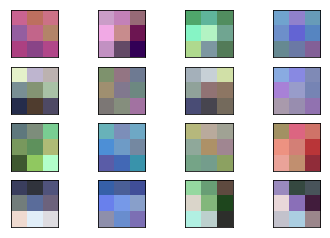

In [37]:
# plot filters
# I want to try to plot all three channels together

#num_filters = 16
#for i in range(num_filters):
#    # Isolate the filter
#    filt = filters[:, :, :, i]
#    a = plt.subplot(1, num_filters, i+1)
#    a. set_xticks([])
#    a.set_yticks([])
#    # plot filters 
#    plt.imshow(filt, cmap=plt.cm.binary)

# plot in 4x4 square, so the filters are easier to see
square = 4
i = 0
for j in range(square):
    for j in range(square):
        a = plt.subplot(square,square,i+1)
        a.set_xticks([])
        a.set_yticks([])
        # plot 
        plt.imshow(filters[:, :, :, i], cmap=plt.cm.binary)
        i += 1

#for j in range(num_filters//2, num_filters):
#    # Isolate the filter
#    filt = filters[:, :, :, j]
#    a = plt.subplot(2, num_filters//2, j+1)
#    a. set_xticks([])
#    a.set_yticks([])
#    # plot filters 
#    plt.imshow(filt, cmap=plt.cm.binary)

In [38]:
from tensorflow.keras.models import Model

In [39]:
'''
2.2 b) Display the 16 feature maps as images from the first conv layer 
generated for the first testing image.
'''

'''
In order to get the feature maps produced by passing the first testing 
image to the first conv layer, we need to change our model so that it 
outputs after the first conv layer
'''
# Isolate outputs from the first layer of the model
first_layer_of_model = Model(inputs=model.inputs, outputs=model.layers[0].output)


In [40]:
# Get the first testing image, and reshape to feed to model
first_test_img = test_images[0].reshape(1,32,32,3)

In [41]:
# Get the feature maps of the first layer
feature_maps = first_layer_of_model.predict(first_test_img)

In [42]:
feature_maps.shape

(1, 32, 32, 16)

In [43]:
feature_maps[0, :, :, 2].shape

(32, 32)

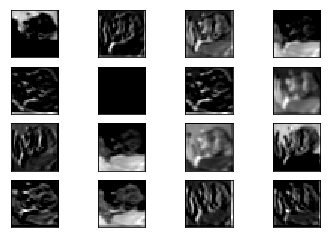

In [44]:
# plot the feature maps in a 4x4 square
square = 4
i = 0 
for j in range(square):
    for j in range(square):
        feature = feature_maps[0, :, :, i]
        a = plt.subplot(square, square, i+1)
        a. set_xticks([])
        a.set_yticks([])
        plt.imshow(feature, cmap='gray')
        i += 1

### 2.3 Overfitting Observation 

In [45]:
train_images.shape

(45000, 32, 32, 3)

In [46]:
'''
2.3 a) Use a small set of training images (100) to run the 
same implementation as in part 1. Plot the training and 
validaton loss curves in a single figure. Find out the number
of epochs it takes to overfit. 
'''

# Isolate 100 training images:
# Get 100 random indices
shuffle_indices = random.sample(range(0,45000), 100)
train_imgs_100 = train_images[shuffle_indices]
train_labels_100 = train_labels_categorical[shuffle_indices]

In [47]:
train_imgs_100.shape

(100, 32, 32, 3)

In [48]:
# Feed our small set of training images to the model

num_epochs = 20

model = build_model()

history = model.fit(train_imgs_100, train_labels_100, 
                    validation_data=(val_images, val_labels_categorical), 
                    epochs=num_epochs, batch_size=1, verbose=1)

Train on 100 samples, validate on 5000 samples
Epoch 1/20
100/100 [==============================] - 12s 120ms/sample - loss: 2.3319 - accuracy: 0.0700 - val_loss: 2.2951 - val_accuracy: 0.1018
Epoch 2/20
100/100 [==============================] - 12s 116ms/sample - loss: 2.2690 - accuracy: 0.1300 - val_loss: 2.3690 - val_accuracy: 0.0938
Epoch 3/20
100/100 [==============================] - 12s 117ms/sample - loss: 2.2640 - accuracy: 0.1100 - val_loss: 2.2775 - val_accuracy: 0.1092
Epoch 4/20
100/100 [==============================] - 12s 115ms/sample - loss: 2.1940 - accuracy: 0.2000 - val_loss: 2.2408 - val_accuracy: 0.1726
Epoch 5/20
100/100 [==============================] - 12s 115ms/sample - loss: 2.1428 - accuracy: 0.2600 - val_loss: 2.2683 - val_accuracy: 0.1700
Epoch 6/20
100/100 [==============================] - 12s 115ms/sample - loss: 2.0952 - accuracy: 0.3100 - val_loss: 2.2345 - val_accuracy: 0.1808
Epoch 7/20
100/100 [==============================] - 12s 115ms/sample 

Text(0.5, 1.0, 'Training Loss')

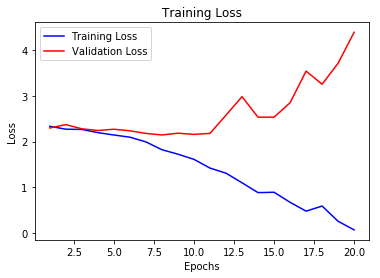

In [49]:
# Plot th training and validation loss curves
train_loss100 = history.history['loss']
val_loss100 = history.history['val_loss']

plt.plot(epoch_range, train_loss100, 'b', label='Training Loss') 
plt.plot(epoch_range, val_loss100, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.title('Training Loss')

In [51]:
# It looks like the overfitting begins around the 5th epoch

In [68]:
'''
2.3 b) Add drop out layers as regularization method to reduce overfitting
'''

# re-create the model with dropout layers

def build_model1():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3), padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2,2), strides=2)) 
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(10, activation='softmax')) 

    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [69]:
model1 = build_model1()
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)         

In [70]:
num_epochs = 20 
history = model1.fit(train_imgs_100, train_labels_100, 
                    validation_data=(val_images, val_labels_categorical), 
                    epochs=num_epochs, batch_size=1, verbose=1)

Train on 100 samples, validate on 5000 samples
Epoch 1/20
100/100 [==============================] - 12s 123ms/sample - loss: 2.3337 - accuracy: 0.0900 - val_loss: 2.3001 - val_accuracy: 0.1004
Epoch 2/20
100/100 [==============================] - 13s 126ms/sample - loss: 2.3052 - accuracy: 0.0700 - val_loss: 2.2928 - val_accuracy: 0.1004
Epoch 3/20
100/100 [==============================] - 12s 120ms/sample - loss: 2.2573 - accuracy: 0.1200 - val_loss: 2.2824 - val_accuracy: 0.1448
Epoch 4/20
100/100 [==============================] - 12s 119ms/sample - loss: 2.2413 - accuracy: 0.1300 - val_loss: 2.2643 - val_accuracy: 0.1528
Epoch 5/20
100/100 [==============================] - 12s 124ms/sample - loss: 2.2072 - accuracy: 0.1500 - val_loss: 2.2569 - val_accuracy: 0.1484
Epoch 6/20
100/100 [==============================] - 12s 120ms/sample - loss: 2.1541 - accuracy: 0.2400 - val_loss: 2.2349 - val_accuracy: 0.1628
Epoch 7/20
100/100 [==============================] - 12s 120ms/sample 

Text(0.5, 1.0, 'Training Loss')

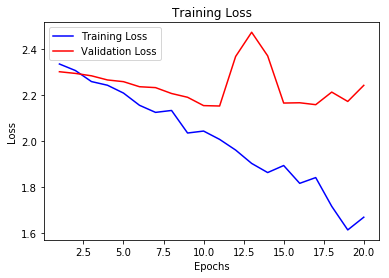

In [71]:
# Plot th training and validation loss curves
train_loss1001 = history.history['loss']
val_loss1001 = history.history['val_loss']

plt.plot(epoch_range, train_loss1001, 'b', label='Training Loss') 
plt.plot(epoch_range, val_loss1001, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.title('Training Loss')